<a href="https://colab.research.google.com/github/VeraaaaWei/data_analytics/blob/Python/Lasso%2BPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

多项式的参数: [ 7.97493687e+03 -3.95327723e+04  8.15267471e+04 -9.06422607e+04
  5.88285554e+04 -2.25180135e+04  4.87160527e+03 -5.36079622e+02
  2.65870147e+01 -1.01729050e-01]
正则化多项式的参数: [-1.56285567  0.80360567  1.83515836  1.60737816  0.33642308 -1.67572817
 -3.7735305  -3.02934213  4.78724592 -0.11250135]


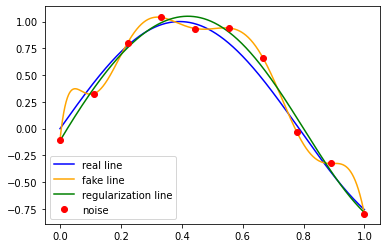

In [3]:
import numpy as np
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
# 目标函数
def real_func(x):
    return np.sin(4*x)
# 多项式
def fake_func(w, x):
    f = np.poly1d(w)
    return f(x)
# 误差函数
def residuals_func(w, x, y):
    ret = fake_func(w, x) - y
    return ret
# 加入正则化的误差函数
regularization = 0.0001
def regularization_residuals_fun(w, x, y):
    ret = fake_func(w, x) - y
    ret = np.append(ret,np.sqrt(regularization * np.square(w)))
    return ret
# 为了便于观察，加上噪声的十个点
X = np.linspace(0, 1, 10)
Y = [np.random.normal(0, 0.1) + y1 for y1 in real_func(X)]
x_points = np.linspace(0, 1, 1000)
def fitting(P=0):   # P为多项式的次数
    # 随机初始化多项式参数
    p_init = np.random.rand(P + 1)  # 生成p+1个随机数的列表，这样poly1d函数返回的多项式次数就是p(例如y=ax+b,为1次，初始化a,b两项)
    # 最小二乘法
    p_lsq = leastsq(residuals_func, p_init, args=(X, Y))  # # 三个参数：误差函数、函数参数列表、数据点
    print('多项式的参数:', p_lsq[0])
    regularize_p_lsq = leastsq(regularization_residuals_fun, p_init, args=(X, Y))  # # 三个参数：误差函数、函数参数列表、数据点
    print('正则化多项式的参数:', regularize_p_lsq[0])
    # 可视化
    plt.plot(x_points, real_func(x_points), 'blue',label='real line')  # 真实曲线
    plt.plot(x_points, fake_func(p_lsq[0], x_points), 'orange', label='fake line')  # 拟合曲线
    plt.plot(x_points, fake_func(regularize_p_lsq[0], x_points), 'green', label='regularization line')  # 拟合正则化后的曲线
    plt.plot(X, Y, 'ro', label='noise')  # 十个噪点分布
    plt.legend()
    plt.show()
    return p_lsq
end = fitting(P=9)  # 九次多项式

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd
import os
path="C:/Users/Administrator/Desktop/o25mso/homework/AMZN.csv"#存放文件路径，这个文件在我的资源上传里
df=pd.read_csv(path)#读取文件
pca=PCA()#创建对象
df=(df.iloc[:,2:]-df.iloc[:,2:].mean())/df.iloc[:,2:].std()#对数据进行中心化处理
#print(df)
pca.fit(df)
print(pca.components_)#返回模型的各个特征向量
print(pca.explained_variance_ratio_)#返回各个成分各自的方差百分比
pca=PCA(2)#设置转化主成分个数两个
pca.fit(df)
low_d=pca.transform(df)
print(low_d)#返回降维后的数据